# **K-means - isotropic data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

(300, 2) 
 (240, 2) (60, 2)


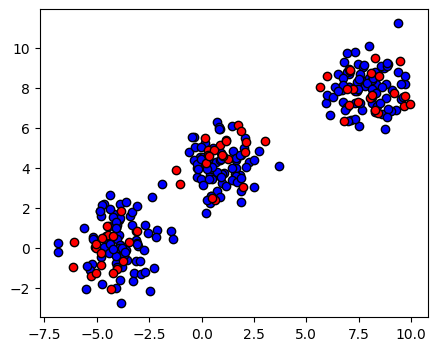

In [ ]:
# Generate data
X, _ = make_blobs(n_samples = 300 , n_features = 2, random_state = 3)

# Create train / test splits
X_train, X_test = train_test_split(X,test_size=0.2,random_state=3)

# Plot everything and print all shapes
_,ax=plt.subplots(figsize=(5,4))
# axes[0].scatter( _ , _ , c = _ , edgecolors='k', cmap=plt.cm.Paired)
ax.scatter( X_train[:,0] , X_train[:,1] , c = 'b' , edgecolors='k')
ax.scatter( X_test[:,0] , X_test[:,1] , c = 'r' , edgecolors='k')

print (X.shape, "\n", X_train.shape, X_test.shape)

## **Elbow method**

In [ ]:
# Create a distance function
#esta calcula la distancia euclidiana
def euclidean_distance(pt1, pt2):
  assert len(pt1) == 2, "Error! No 2d point"
  assert len(pt2) == 2, "Error! No 2d point"
  return (pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2

In [ ]:
# Define num of clusters
clusters = [ 2,3,4,5,6,7,8,9,10 ] # K=1 no tiene sentido
elbow_distances = [] #se guarda el valo de la distancia segun cada cluster

# Eval kmeans over each num of clusters
for k in clusters:
  kmeans = KMeans(n_clusters = k )
  kmeans.fit( X_train )

  centroides = kmeans.cluster_centers_ #con esto se sacan los centroides
  predictions = kmeans.predict( X_test )
  distance = 0

  for i in range(0,len(X_test)) :
    centroide = centroides[predictions[i]] #esto es para tomar cada una de las posiciones
    distance += euclidean_distance( centroide , X_test[i] )

  elbow_distances.append(distance/len(X_test))
  #elbow_distances va a contener todas las distancias y todas las k
print (len(elbow_distances),len(clusters))


9 9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0.5, 1.0, 'Elbow')

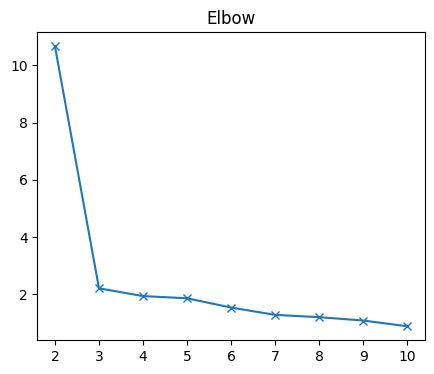

In [ ]:
# Plot the elbow
_, ax = plt.subplots (figsize = (5,4))
ax.plot( clusters , elbow_distances , marker="x")
ax.set_title("Elbow")

#es conocer cual sería el valor de cluster adecuado

## **Silhouette method**

In [ ]:
from sklearn.metrics import silhouette_score

# Define num of clusters
clusters = [ 2,3,4,5,6,7,8,9,10 ]
silhouette_distances = []

# Eval kmeans over each num of clusters
for k in clusters :
  kmeans = KMeans(n_clusters = k )
  kmeans.fit( X_train )

  predictions = kmeans.predict( X_test )
  distance = silhouette_score( X_test , predictions , metric="euclidean")

  silhouette_distances.append(distance)

print (len(silhouette_distances), len(clusters))

9 9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0.5, 1.0, 'Silhouette')

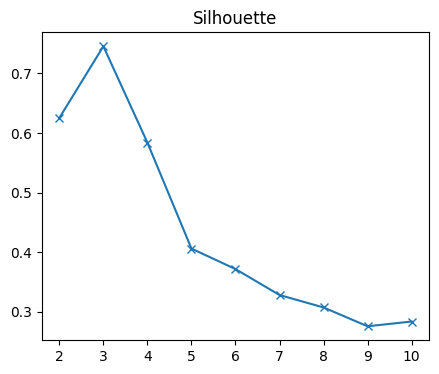

In [ ]:
# Plot the silhouette
_, ax = plt.subplots (figsize = (5,4))
ax.plot( clusters , silhouette_distances , marker="x")
ax.set_title("Silhouette")

Recomendación del docente: Calcular ambas

# **K-Means - Real data**

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

<ipython-input-5-b3932a975449>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], edgecolors='k', cmap=plt.cm.Paired)


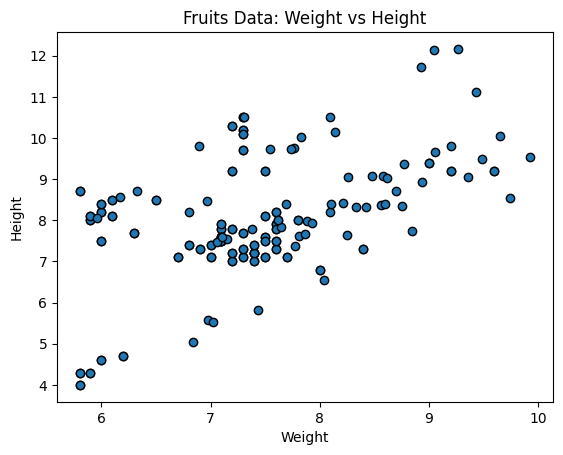

In [5]:
data = pd.read_csv("/content/fruits_data_ext.csv")
X = data[['width', 'height']].values

X_train, X_test = train_test_split(X, test_size=0.2, random_state=1)

plt.scatter(X[:, 0], X[:, 1], edgecolors='k', cmap=plt.cm.Paired)
plt.title("Fruits Data: Weight vs Height")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

## **Elbow**

In [6]:
# Create a distance function
#esta calcula la distancia euclidiana
def euclidean_distance(pt1, pt2):
  assert len(pt1) == 2, "Error! No 2d point"
  assert len(pt2) == 2, "Error! No 2d point"
  return (pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2

In [7]:
# Define num of clusters
clusters = [ 2,3,4,5,6,7,8,9,10 ] # K=1 no tiene sentido
elbow_distances = [] #se guarda el valo de la distancia segun cada cluster

In [10]:
def elbow_kmeans(clusters, X_train, X_test):
    elbow_distances = []
    for k in clusters:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X_train)

        centroids = kmeans.cluster_centers_
        predictions = kmeans.predict(X_test)
        distance = 0

        for i in range(len(X_test)):
            centroide = centroids[predictions[i]]
            distance += euclidean_distance(centroide, X_test[i])

        elbow_distances.append(distance / len(X_test))
    return elbow_distances

In [11]:
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
elbow_distances = elbow_kmeans(clusters, X_train, X_test)

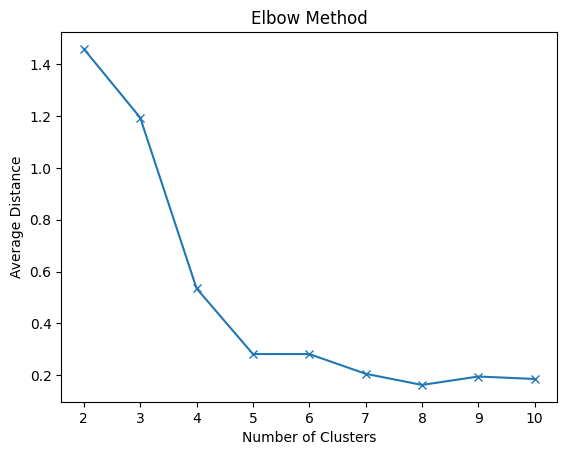

In [12]:
plt.plot(clusters, elbow_distances, marker="x")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Distance")
plt.show()


## **Silhouette**

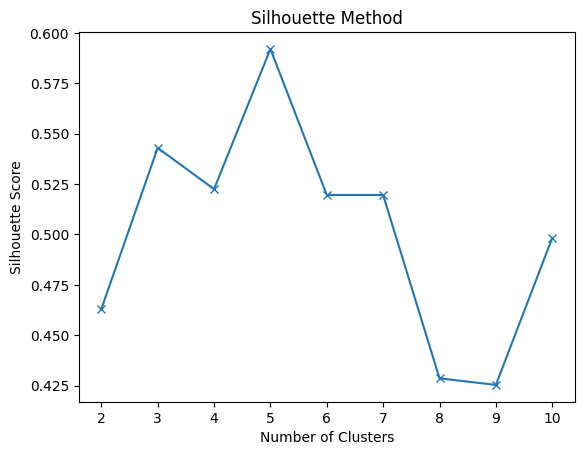

In [13]:
def silhouette_kmeans(clusters, X_train, X_test):
    silhouette_distances = []
    for k in clusters:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X_train)

        predictions = kmeans.predict(X_test)
        score = silhouette_score(X_test, predictions, metric="euclidean")
        silhouette_distances.append(score)
    return silhouette_distances

silhouette_distances = silhouette_kmeans(clusters, X_train, X_test)

# Plot the Silhouette graph
plt.plot(clusters, silhouette_distances, marker="x")
plt.title("Silhouette Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


In [ ]:
clusters = [ _ ]

silhouette = silhouette_kmeans( _ , _ )

## **Comparison**

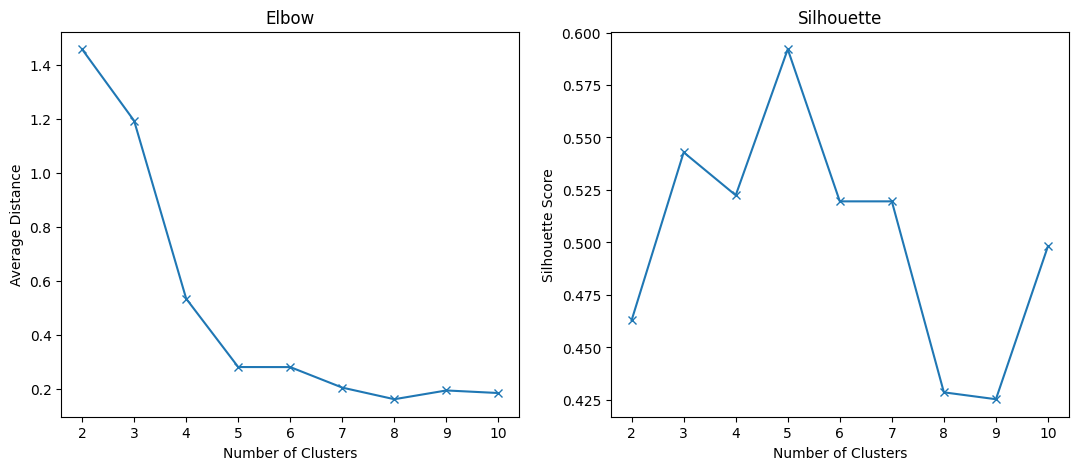

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
axes[0].plot(clusters, elbow_distances, marker="x")
axes[0].set_title("Elbow")
axes[0].set_xlabel("Number of Clusters")
axes[0].set_ylabel("Average Distance")

axes[1].plot(clusters, silhouette_distances, marker="x")
axes[1].set_title("Silhouette")
axes[1].set_xlabel("Number of Clusters")
axes[1].set_ylabel("Silhouette Score")
plt.show()

## **Clustering**

In [15]:
kmeans = KMeans(n_clusters=3).fit(X_train)
centroids = kmeans.cluster_centers_
print("Centroids:\n", centroids)

Centroids:
 [[ 7.04606706  7.31554075]
 [ 7.77574372 10.27119826]
 [ 8.93617365  8.95284032]]


In [16]:
predictions = kmeans.predict(X_test)

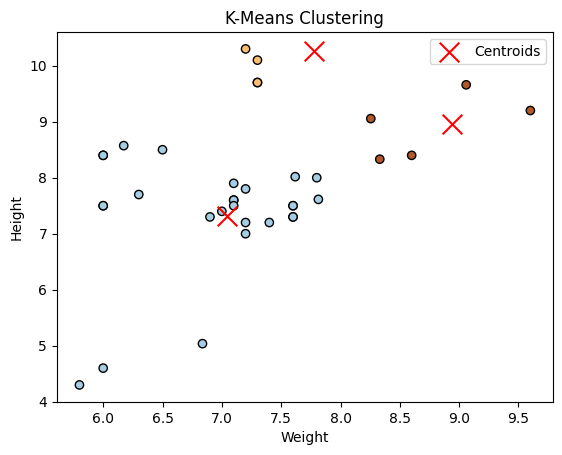

In [17]:
# Plot decision boundaries
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red', label="Centroids")
plt.title("K-Means Clustering")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.legend()
plt.show()